Step 1: Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

Step 2: Loading The Dataset and preprocessing

In [2]:
all_columns = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Class']
df = pd.read_csv('glass.data', names = all_columns)

In [3]:
df

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
#Removing the Id column
print(df.columns)
df.drop(columns = ['Id'], inplace = True)
df

Index(['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Class'], dtype='object')


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


Step 3: Visualizing the dataset

In [5]:
count = df['Class'].value_counts()
print(count)

2    76
1    70
7    29
3    17
5    13
6     9
Name: Class, dtype: int64


In [6]:
values = count.index.tolist()
freq = count.values.tolist()
values

[2, 1, 7, 3, 5, 6]

In [7]:
values.append(4)
values

[2, 1, 7, 3, 5, 6, 4]

In [8]:
print(freq)
freq.append(0)
freq

[76, 70, 29, 17, 13, 9]


[76, 70, 29, 17, 13, 9, 0]

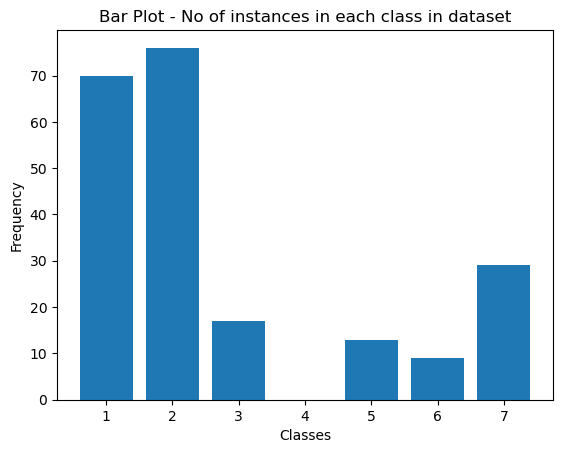


      -- 1 building_windows_float_processed (70)
      -- 2 building_windows_non_float_processed (76)
      -- 3 vehicle_windows_float_processed (17)
      -- 4 vehicle_windows_non_float_processed (0)
      -- 5 containers (13)
      -- 6 tableware (9)
      -- 7 headlamps (29)




In [9]:
#Visualizing the dataset
plt.bar(values,freq)
plt.xlabel('Classes')
plt.ylabel('Frequency')
# plt.xticks(ticks = [1,2,3,4,5,6,7])
plt.title('Bar Plot - No of instances in each class in dataset')
plt.show()
print('''
      -- 1 building_windows_float_processed (70)
      -- 2 building_windows_non_float_processed (76)
      -- 3 vehicle_windows_float_processed (17)
      -- 4 vehicle_windows_non_float_processed (0)
      -- 5 containers (13)
      -- 6 tableware (9)
      -- 7 headlamps (29)

''')

Step 4: Instantiating a decision tree model using Entropy

In [10]:
classifier = DecisionTreeClassifier(criterion= 'entropy')

Step 5: Keeping the data in X and Class in y

In [11]:
X = df.copy()
y = X[['Class']]
X.drop(columns = ['Class'], inplace = True)

In [12]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [13]:
y

,Class
0,1
1,1
2,1
3,1
4,1
...,...
209,7
210,7
211,7
212,7


Step 6: Splitting the dataset into 33% testing Set and 67% Training Set

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state= 69)

In [15]:
X_train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
34,1.51783,12.69,3.54,1.34,72.95,0.57,8.75,0.00,0.00
187,1.52315,13.44,3.34,1.23,72.38,0.60,8.83,0.00,0.00
159,1.51796,13.50,3.36,1.63,71.94,0.57,8.81,0.00,0.09
67,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.00,0.17
84,1.51409,14.25,3.09,2.08,72.28,1.10,7.08,0.00,0.00
...,...,...,...,...,...,...,...,...,...
90,1.51841,12.93,3.74,1.11,72.28,0.64,8.96,0.00,0.22
107,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.00,0.24
201,1.51653,11.95,0.00,1.19,75.18,2.70,8.93,0.00,0.00
203,1.51658,14.80,0.00,1.99,73.11,0.00,8.28,1.71,0.00


In [16]:
y_train

,Class
34,1
187,7
159,3
67,1
84,2
...,...
90,2
107,2
201,7
203,7


In [17]:
#Visualizing the training dataset as whole
trnset = pd.concat([X_train,y_train], axis = 1)
trnset

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
34,1.51783,12.69,3.54,1.34,72.95,0.57,8.75,0.00,0.00,1
187,1.52315,13.44,3.34,1.23,72.38,0.60,8.83,0.00,0.00,7
159,1.51796,13.50,3.36,1.63,71.94,0.57,8.81,0.00,0.09,3
67,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.00,0.17,1
84,1.51409,14.25,3.09,2.08,72.28,1.10,7.08,0.00,0.00,2
...,...,...,...,...,...,...,...,...,...,...
90,1.51841,12.93,3.74,1.11,72.28,0.64,8.96,0.00,0.22,2
107,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.00,0.24,2
201,1.51653,11.95,0.00,1.19,75.18,2.70,8.93,0.00,0.00,7
203,1.51658,14.80,0.00,1.99,73.11,0.00,8.28,1.71,0.00,7


In [18]:
#visualizing the testing dataset as a whole
tstset = pd.concat([X_test, y_test], axis = 1)
tstset

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
99,1.51811,12.96,2.96,1.43,72.92,0.60,8.79,0.14,0.00,2
161,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24,3
190,1.51613,13.88,1.78,1.79,73.10,0.00,8.67,0.76,0.00,7
62,1.52172,13.51,3.86,0.88,71.79,0.23,9.54,0.00,0.11,1
23,1.51751,12.81,3.57,1.35,73.02,0.62,8.59,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...
200,1.51508,15.15,0.00,2.25,73.50,0.00,8.34,0.63,0.00,7
46,1.51869,13.19,3.37,1.18,72.72,0.57,8.83,0.00,0.16,1
97,1.51743,12.20,3.25,1.16,73.55,0.62,8.90,0.00,0.24,2
123,1.51707,13.48,3.48,1.71,72.52,0.62,7.99,0.00,0.00,2


In [19]:
cltset = pd.concat([trnset,tstset], axis = 0)
cltset.sort_index()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


Step 7: Feeding the training set into the model

In [20]:
model = classifier.fit(X_train,y_train)

In [21]:
model

DecisionTreeClassifier(criterion='entropy')

Step 8: Inference On The testing Set

In [22]:
predictions = model.predict(X_test)

In [23]:
predictions

array([2, 1, 7, 1, 1, 7, 2, 5, 1, 6, 5, 2, 1, 2, 3, 1, 7, 2, 1, 1, 2, 7,
       1, 2, 1, 3, 5, 2, 7, 3, 1, 1, 2, 1, 1, 2, 7, 7, 1, 1, 1, 1, 5, 2,
       2, 2, 3, 2, 2, 2, 5, 1, 1, 2, 1, 2, 2, 1, 1, 7, 1, 2, 6, 1, 2, 1,
       7, 1, 1, 2, 2], dtype=int64)

In [24]:
y_test

,Class
99,2
161,3
190,7
62,1
23,1
...,...
200,7
46,1
97,2
123,2


Step 9: Computing the confusion matrix

In [25]:
cm = confusion_matrix(predictions, y_test)

In [26]:
cm

array([[18,  7,  3,  0,  0,  0],
       [ 5, 15,  2,  0,  0,  1],
       [ 0,  3,  1,  0,  0,  0],
       [ 0,  1,  0,  4,  0,  0],
       [ 0,  0,  0,  0,  2,  0],
       [ 0,  1,  0,  1,  0,  7]], dtype=int64)

Step 10: Plotting the confusion matrix in the form of heatmap

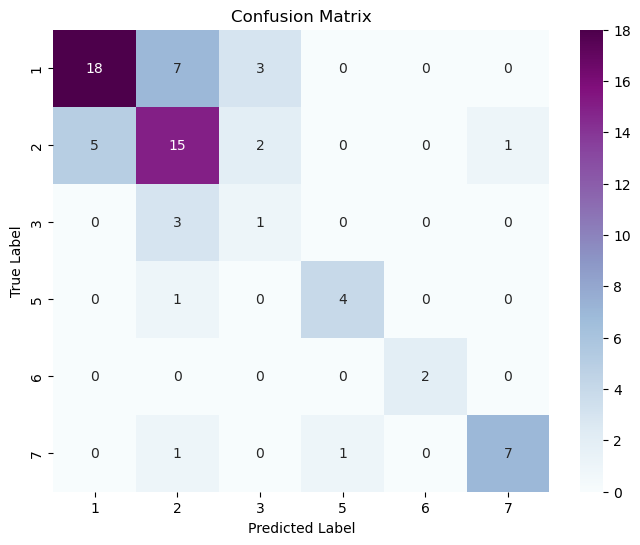

In [27]:
# Define class labels
class_labels = np.unique(y_test)
# print(class_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="BuPu", xticklabels=class_labels, yticklabels=class_labels) #BuPy,Greens,Blues,Reds
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Step 11: Generating classification report

In [28]:
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           1       0.64      0.78      0.71        23
           2       0.65      0.56      0.60        27
           3       0.25      0.17      0.20         6
           5       0.80      0.80      0.80         5
           6       1.00      1.00      1.00         2
           7       0.78      0.88      0.82         8

    accuracy                           0.66        71
   macro avg       0.69      0.70      0.69        71
weighted avg       0.65      0.66      0.65        71



Step 12: Plotting the decision tree

In [29]:
pk = model.classes_.tolist()
print(pk)
strings = list(map(str, pk))
print(strings)

[1, 2, 3, 5, 6, 7]
['1', '2', '3', '5', '6', '7']


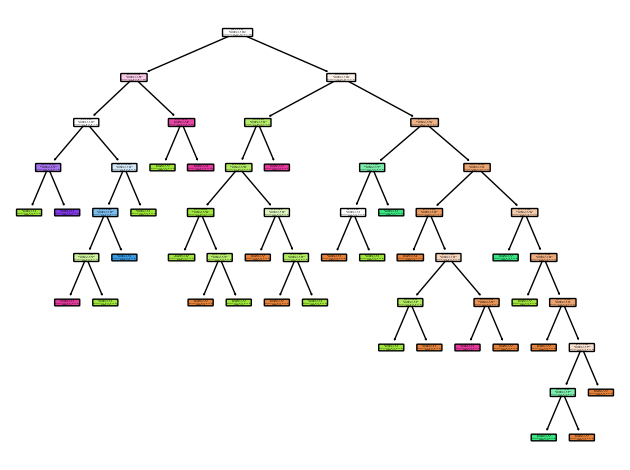

In [30]:
# %matplotlib qt
plot_tree(model, feature_names= X.columns, class_names= strings, filled = True, rounded= True)
plt.tight_layout()
# plt.savefig('maxdepth-9.png', dpi = 2400)
plt.show()

In [31]:
# Get the depth of the tree
depth = classifier.tree_.max_depth
print("Depth of the tree:", depth)

Depth of the tree: 9


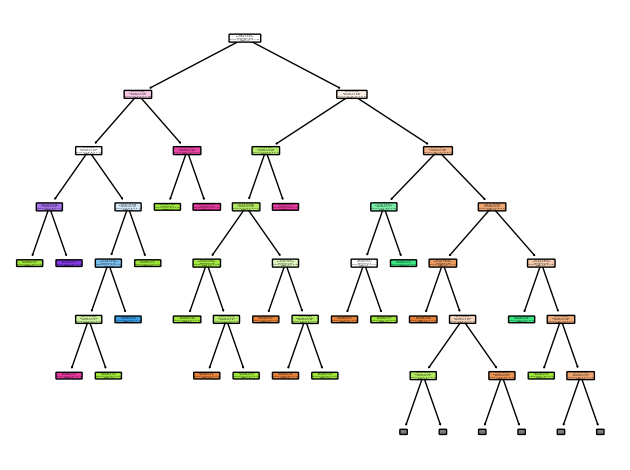

In [32]:
plot_tree(model, feature_names= X.columns,class_names= strings, filled = True, rounded= True, max_depth= 6)
plt.tight_layout()
# plt.savefig('depth6.png', dpi = 2400)
plt.show()

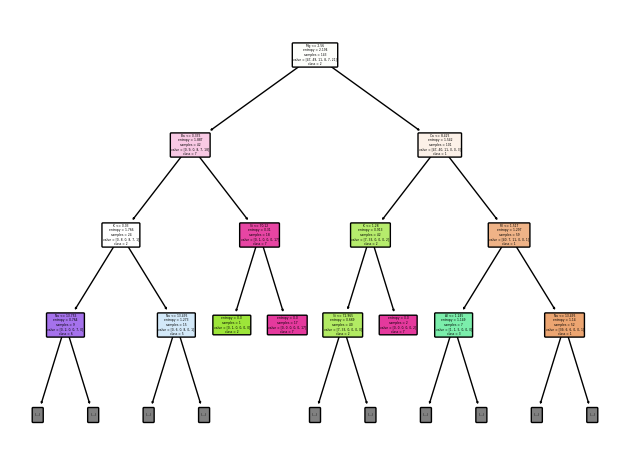

In [33]:
plot_tree(model, feature_names= X.columns,class_names= strings, filled = True, rounded= True, max_depth= 3)
plt.tight_layout()
# plt.savefig('depth3.png', dpi = 2400)
plt.show()